In [33]:
import pandas as pd
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
import visualization_functions

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
log_reg_master_df = pd.read_csv("cleaned-datasets/mammographic/logistic_regression_df.csv")
GBDT_master_df = pd.read_csv("cleaned-datasets/mammographic/GBDT_master_df.csv", index_col=0)

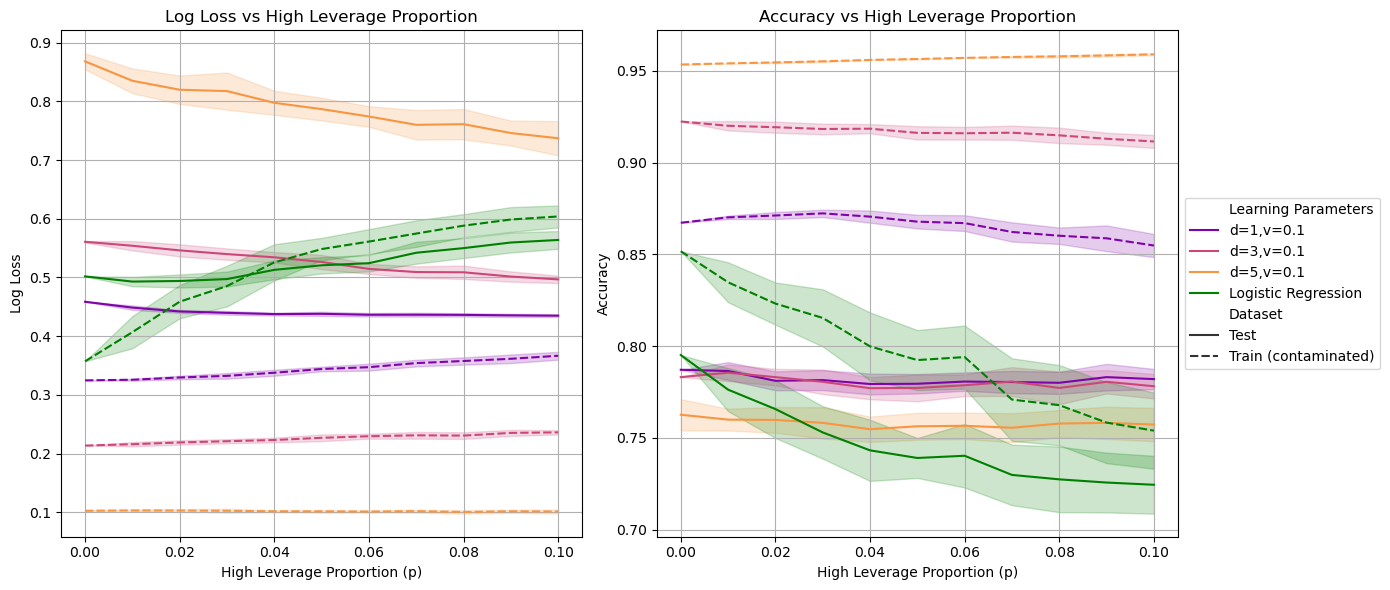

In [51]:
example_df1 = GBDT_master_df.loc[(GBDT_master_df["GradientBoostingClassifier.learning_rate"] == 0.1) & (GBDT_master_df["GradientBoostingClassifier.max_depth"].isin([1,3,5]))]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

visualization_functions.plot_performance_comparison_by_outlier_proportion(example_df1, log_reg_master_df, performance_type="log_loss", legend=False, ax=ax1)
visualization_functions.plot_performance_comparison_by_outlier_proportion(example_df1, log_reg_master_df, performance_type="accuracy", legend=True, ax=ax2)

plt.tight_layout()
plt.show()

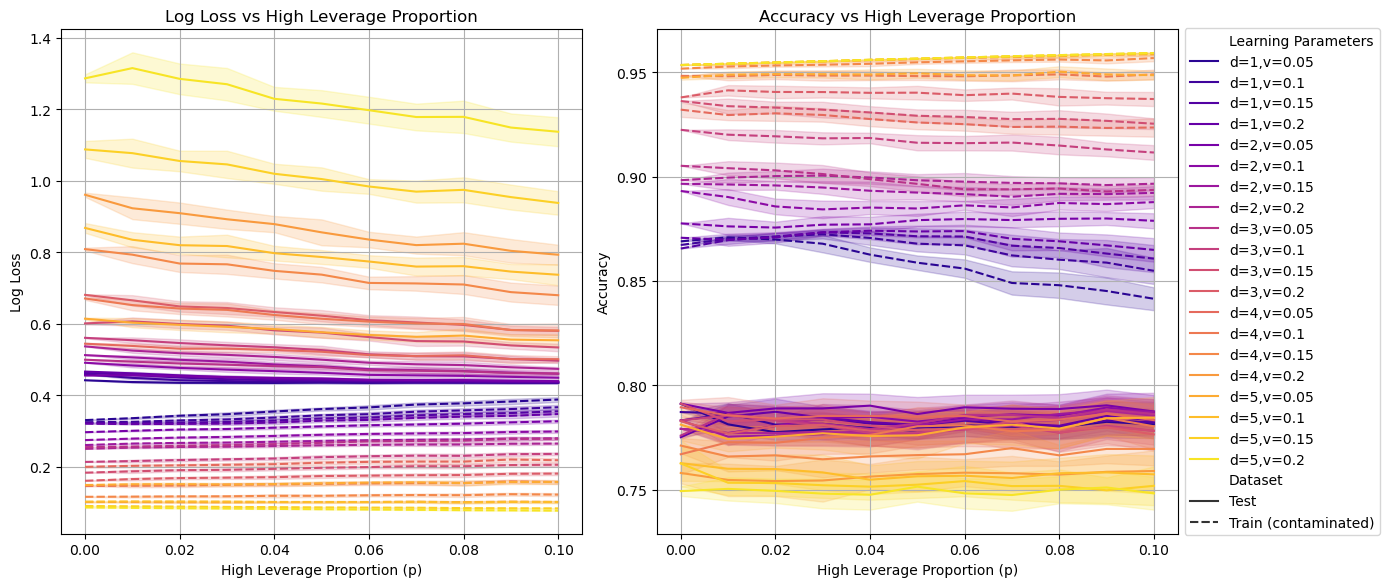

In [53]:
example_df = GBDT_master_df.loc[(GBDT_master_df["GradientBoostingClassifier.learning_rate"] < 0.25) & (GBDT_master_df["GradientBoostingClassifier.max_depth"] > 0)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

visualization_functions.plot_performance_by_outlier_proportion(example_df, performance_type="log_loss", legend=False, ax=ax1)
visualization_functions.plot_performance_by_outlier_proportion(example_df, performance_type="accuracy", legend=True, ax=ax2)

plt.tight_layout()
plt.show()

# Figure 2

In [66]:
GBDT_master_df.rename(columns={"loss_data_filename": "log_loss_data_filename"}, inplace=True)

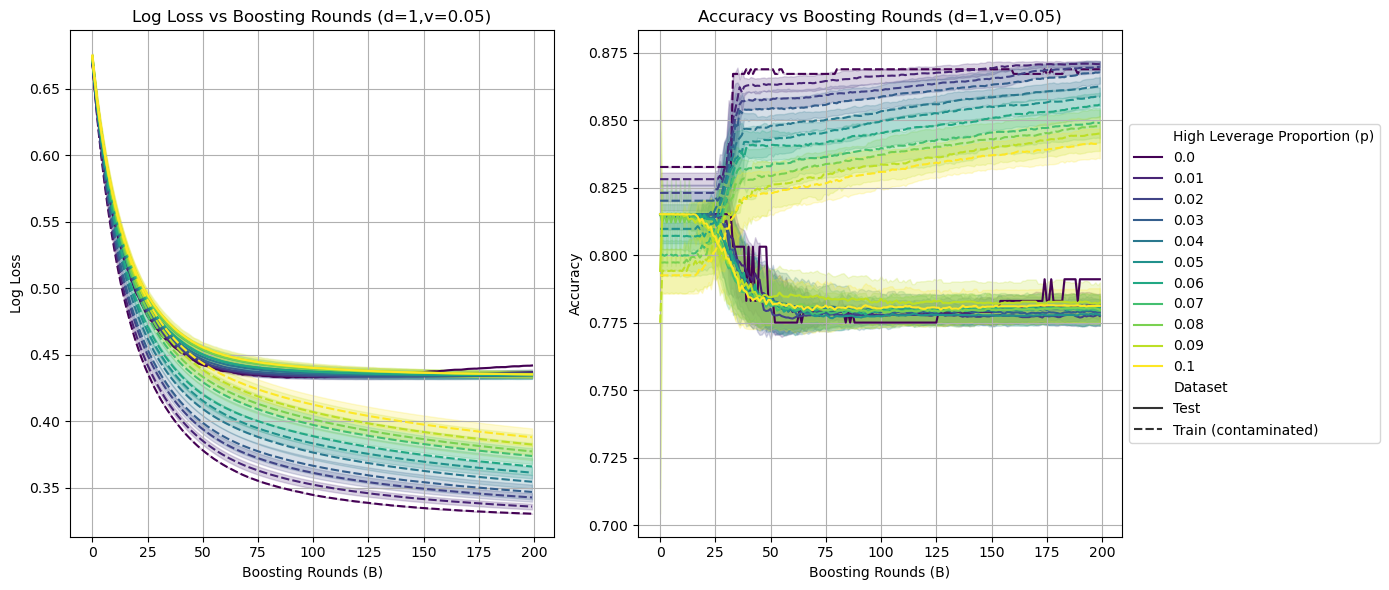

In [81]:
# Visualize loss w.r.t iteration (fixed depth and regularization)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

visualization_functions.plot_performance_by_iteration(GBDT_master_df, max_depth = 1, learning_rate = 0.05, performance_type="log_loss", legend=False, ax=ax1)
visualization_functions.plot_performance_by_iteration(GBDT_master_df, max_depth = 1, learning_rate = 0.05, performance_type="accuracy", legend=True, ax=ax2)

plt.tight_layout()
plt.show()

# boosting_rounds_fig = visualization_functions.plot_performance_by_iteration(GBDT_master_df, max_depth = 3, learning_rate = 0.1, performance_type="accuracy")
# boosting_rounds_fig.show()

In [83]:
GBDT_master_summary_df = pd.read_csv("cleaned-datasets/mammographic/GBDT_master_summary_df.csv", index_col=0)

In [84]:
restricted_summary_df = GBDT_master_summary_df.loc[(GBDT_master_summary_df["GradientBoostingClassifier.learning_rate"] > 0) 
                                                   & (GBDT_master_summary_df["outlier_proportion"].isin([0, 0.1]))
                                                   & (GBDT_master_summary_df["boosting_round"] <= 200)
                                                    ]

/var/folders/d3/0x28nq297r9gh8b116bbkqcm0000gn/T/ipykernel_10659/3809857178.py:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  visualization_functions.plot_all_performance_by_iteration(restricted_summary_df).show()


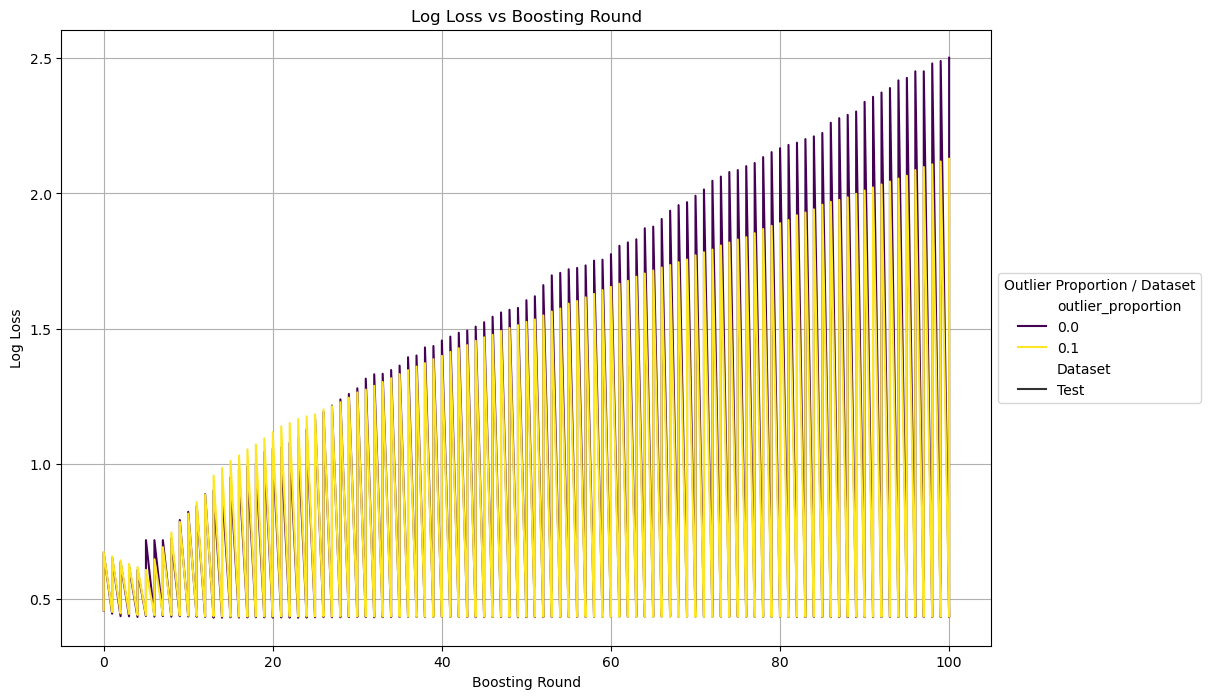

In [127]:
visualization_functions.plot_all_performance_by_iteration(restricted_summary_df).show()

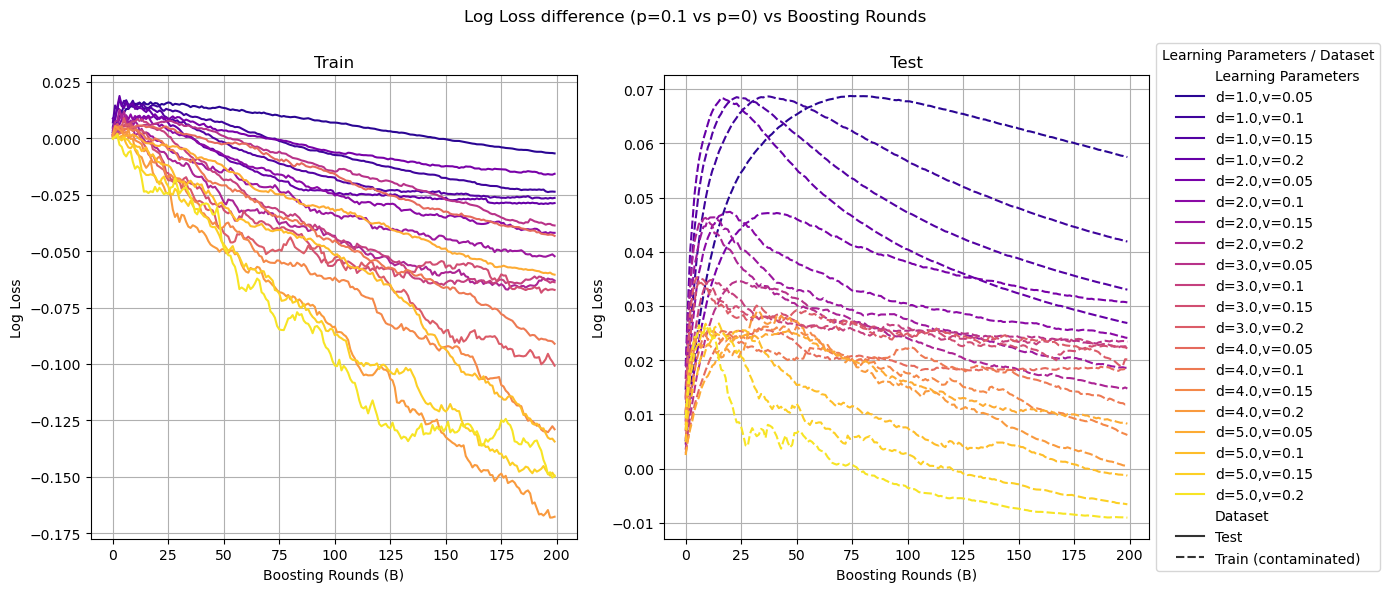

In [103]:
specific_summary_df = GBDT_master_summary_df.loc[(GBDT_master_summary_df["GradientBoostingClassifier.learning_rate"] < 0.25) & 
                                                 (GBDT_master_summary_df["GradientBoostingClassifier.max_depth"] > 0)
                                                 ]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

visualization_functions.plot_performance_difference_by_iteration(specific_summary_df, performance_type="log_loss", test=True, train=False, legend=False, ax=ax1)
visualization_functions.plot_performance_difference_by_iteration(specific_summary_df, performance_type="log_loss", test=False, train=True, legend=True, ax=ax2)

ax1.set_title("Train")
ax2.set_title("Test")

fig.suptitle("Log Loss difference (p=0.1 vs p=0) vs Boosting Rounds")

plt.tight_layout()
plt.show()


# visualization_functions.plot_performance_difference_by_iteration(specific_summary_df, performance_type="log_loss").show()

In [143]:
create_diff_dataframe(GBDT_master_summary_df).iloc[2370]

boosting_round                                   170.000000
GradientBoostingClassifier.max_depth               2.000000
GradientBoostingClassifier.learning_rate           0.200000
diff_mean_log_loss_train_dataset                   0.042939
diff_mean_log_loss_contaminated_train_dataset      0.016725
diff_mean_log_loss_test_dataset                   -0.064034
diff_mean_accuracy_train_dataset                  -0.019483
diff_mean_accuracy_contaminated_train_dataset     -0.004520
diff_mean_accuracy_test_dataset                    0.009639
Name: 2370, dtype: float64

In [ ]:
'''
Do a light check to ensure that the computation is correct
'''
ex = GBDT_master_summary_df


y_columns = [
       'mean_log_loss_train_dataset',
       'mean_log_loss_contaminated_train_dataset',
       'mean_log_loss_test_dataset', 'mean_accuracy_train_dataset',
       'mean_accuracy_contaminated_train_dataset',
       'mean_accuracy_test_dataset'
    ]

row1 = ex.loc[(ex["GradientBoostingClassifier.max_depth"] == 2) &
        (ex["GradientBoostingClassifier.learning_rate"] == 0.2) &
        (ex["boosting_round"] == 170) & 
        (ex["outlier_proportion"] == 0.1)
       ][y_columns].iloc[0]

row2 = ex.loc[(ex["GradientBoostingClassifier.max_depth"] == 2) &
        (ex["GradientBoostingClassifier.learning_rate"] == 0.2) &
        (ex["boosting_round"] == 170) & 
        (ex["outlier_proportion"] == 0)
       ][y_columns].iloc[0]

print(row1 - row2)
